# Proyek Akhir : Menyelesaikan Permasalah Perusahaan Edutech

- **Nama:** Muhammad Fatarsyah Hardeva
- **Email:** hardevafatarsyah@gmail.com
- **ID Dicoding:** fatarsyah_26

## Menyiapkan Library

In [38]:
import pandas as pd
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [39]:
!pip freeze > requirements.txt
from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
df = pd.read_csv('/content/employee_data.csv')
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Data Understanding

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [42]:
missing_values = df.isnull().sum()

In [43]:
df = df.dropna(subset=["Attrition"])

In [44]:
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.0,1058.000000,1058.000000,1058.00000,...,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,1058.000000
mean,736.656900,37.055766,0.169187,809.542533,8.978261,2.879017,1.0,2.712665,65.643667,2.73724,...,2.726843,80.0,0.762760,11.435728,2.769376,2.763705,7.065217,4.26087,2.203214,4.142722
std,427.440538,9.410421,0.375094,408.478049,8.040608,1.031442,0.0,1.092959,20.324861,0.70473,...,1.090970,0.0,0.837537,8.016429,1.302689,0.707392,6.265227,3.61747,3.266948,3.599044
min,2.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.00000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,364.250000,30.000000,0.000000,465.250000,2.000000,2.000000,1.0,2.000000,48.000000,2.00000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,731.500000,36.000000,0.000000,817.500000,7.000000,3.000000,1.0,3.000000,65.000000,3.00000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,1117.750000,43.000000,0.000000,1168.500000,13.000000,4.000000,1.0,4.000000,83.000000,3.00000,...,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,9.000000,7.00000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.00000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.00000,15.000000,17.000000


In [45]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
6,7,40,0.0,Travel_Rarely,1124,Sales,1,2,Medical,1,...,3,80,3,6,2,2,4,3,0,2
7,8,55,1.0,Travel_Rarely,725,Research & Development,2,3,Medical,1,...,4,80,1,24,2,3,5,2,1,4


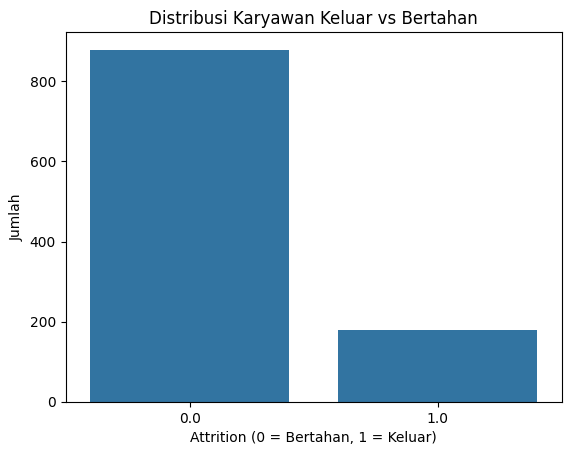

In [46]:
sns.countplot(x="Attrition", data=df)
plt.title("Distribusi Karyawan Keluar vs Bertahan")
plt.xlabel("Attrition (0 = Bertahan, 1 = Keluar)")
plt.ylabel("Jumlah")
plt.show()


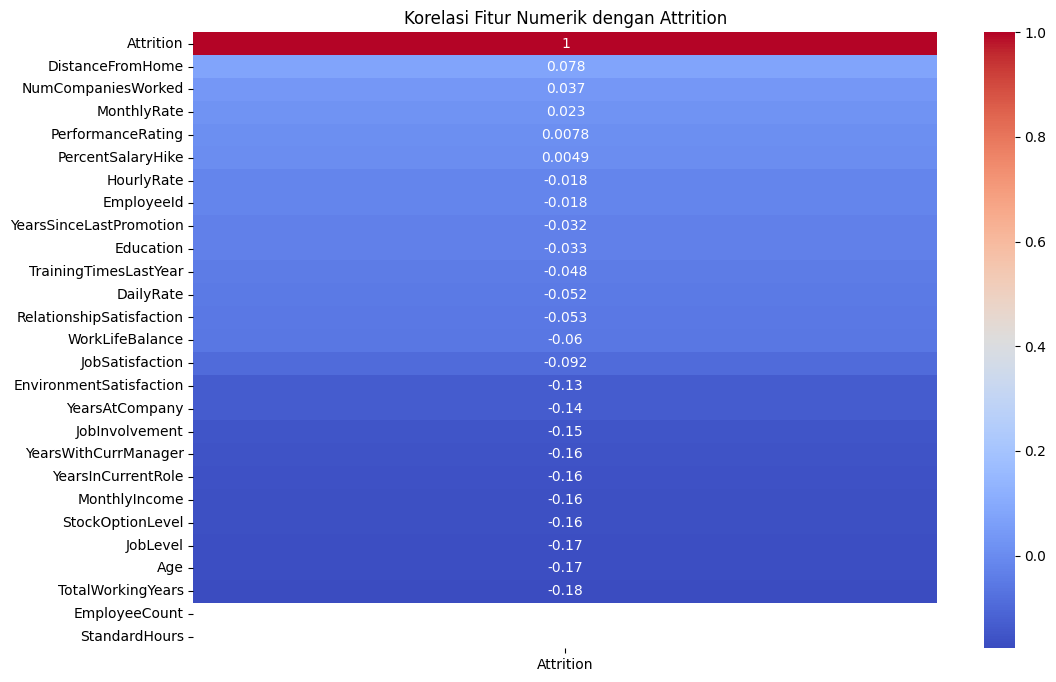

In [47]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr[["Attrition"]].sort_values(by="Attrition", ascending=False), annot=True, cmap="coolwarm")
plt.title("Korelasi Fitur Numerik dengan Attrition")
plt.show()


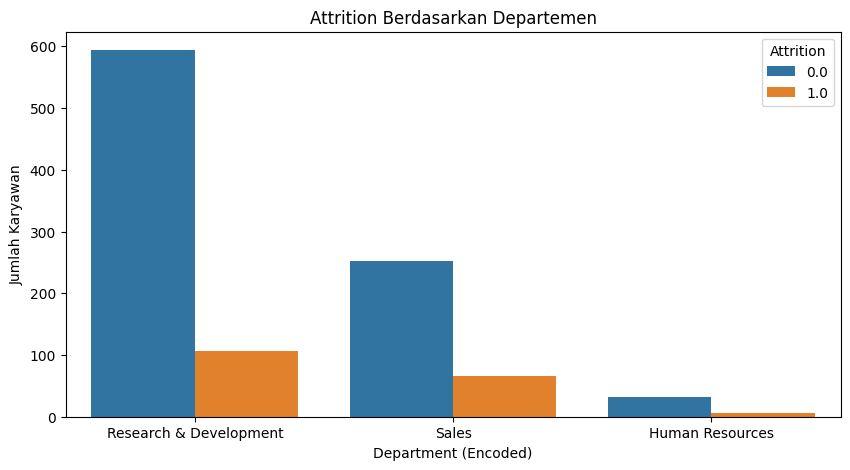

In [48]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Department", hue="Attrition", data=df)
plt.title("Attrition Berdasarkan Departemen")
plt.xlabel("Department (Encoded)")
plt.ylabel("Jumlah Karyawan")
plt.show()

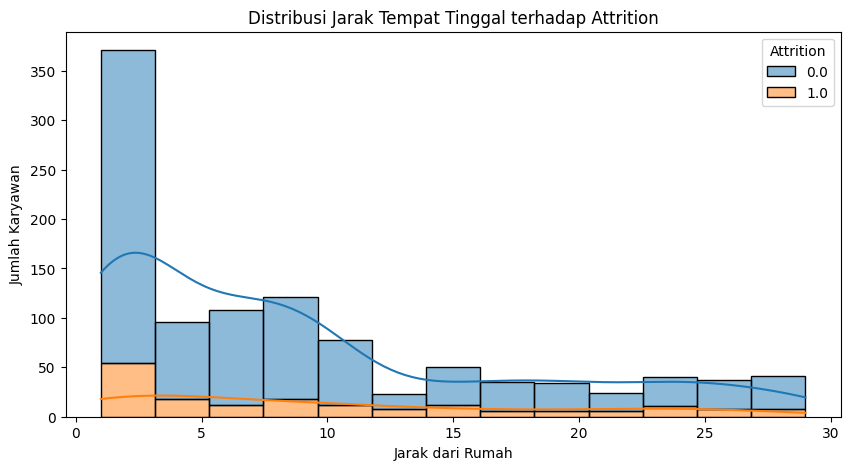

In [49]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="DistanceFromHome", hue="Attrition", kde=True, multiple="stack")
plt.title("Distribusi Jarak Tempat Tinggal terhadap Attrition")
plt.xlabel("Jarak dari Rumah")
plt.ylabel("Jumlah Karyawan")
plt.show()

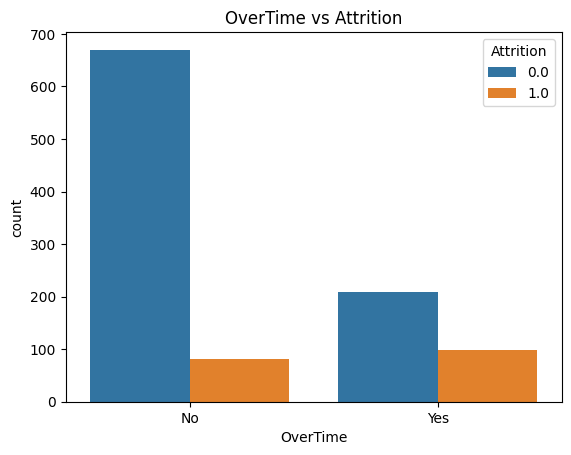

In [50]:
sns.countplot(x="OverTime", hue="Attrition", data=df)
plt.title("OverTime vs Attrition")
plt.show()


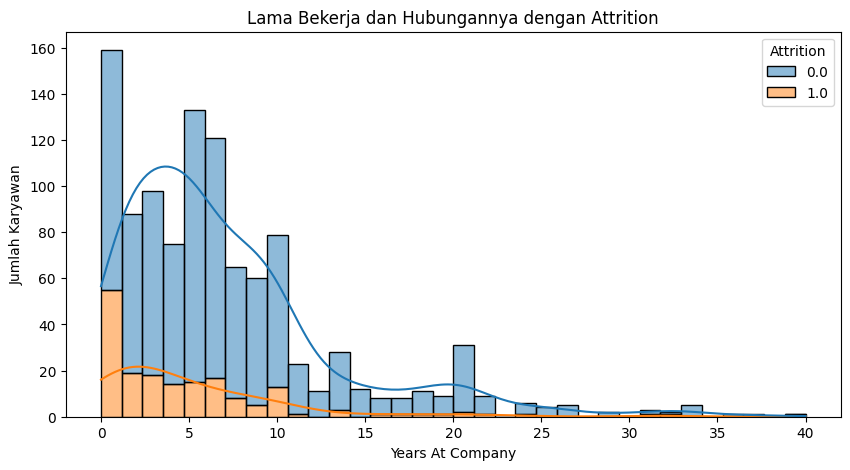

In [51]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="YearsAtCompany", hue="Attrition", kde=True, multiple="stack")
plt.title("Lama Bekerja dan Hubungannya dengan Attrition")
plt.xlabel("Years At Company")
plt.ylabel("Jumlah Karyawan")
plt.show()

## Data Preparation

In [52]:
# Hapus baris dengan nilai Attrition yang kosong
df_clean = df.dropna(subset=["Attrition"])

# Encode target menjadi integer (0 dan 1)
df_clean["Attrition"] = df_clean["Attrition"].astype(int)

# Pisahkan fitur kategorikal
categorical_cols = df_clean.select_dtypes(include=["object"]).columns

# Encode fitur kategorikal
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

# Pisahkan fitur dan target
X = df_clean.drop(columns=["EmployeeId", "Attrition"])  # EmployeeId tidak relevan
y = df_clean["Attrition"]

# Split data ke training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((846, 33), (212, 33), (846,), (212,))

## Modelling

In [53]:
model = RandomForestClassifier(random_state=42)

# Latih model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluation

In [54]:
# Prediksi pada data uji
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluasi hasil
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAUC-ROC Score:", roc_auc_score(y_test, y_proba))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[173   0]
 [ 34   5]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       173
           1       1.00      0.13      0.23        39

    accuracy                           0.84       212
   macro avg       0.92      0.56      0.57       212
weighted avg       0.87      0.84      0.78       212


AUC-ROC Score: 0.7779012894619831

Accuracy Score: 0.839622641509434


In [55]:
# Menyimpan model yang dilatih
joblib.dump(model, 'attrition_model.pkl')

['attrition_model.pkl']